# Initial Data Analysis

Before building our models we need to analyse and optimise our dataset. It will be acomplished using Pandas as it was discovered that CPU works with our 'wide' dataset much faster than GPU does using cuDF library.

Cell bellow is for setting personal prefferences of text style.

In [1]:
import pandas as pd
import numpy as np
from scipy import io

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_matlab_file(file_path):
    mat = io.loadmat(file_path)
    data = mat['v']
    return np.asarray(data, dtype=np.float32)

data = [load_matlab_file(f'OriginalData/T{i:04d}.mat') for i in range(1, 1159)]
df = pd.DataFrame(np.squeeze(np.stack(data), axis=2))

target = np.asarray(io.loadmat('OriginalData/key.mat')['key'], dtype=np.int8).flatten()

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,93742,93743,93744,93745,93746,93747,93748,93749,93750,93751
0,1.145283,-1.193305,0.323707,1.202289,-0.582951,1.110514,1.964748,0.688248,0.609635,0.501688,...,2.049875,-1.737938,0.309602,0.907781,0.268723,2.803080,0.115404,-1.128123,-0.019002,-0.171467
1,-0.191906,0.619338,0.905715,-0.233818,0.836221,0.617092,-0.717223,1.683178,0.792287,-1.124215,...,1.148922,0.104219,0.685059,0.002291,-0.252641,2.795444,-1.530982,0.882041,0.045506,-0.882984
2,-0.151162,0.176902,1.325510,-1.014426,1.375688,2.362037,-0.172859,2.256471,1.422856,-1.467822,...,2.066721,0.505057,1.695127,1.189082,-0.163920,2.596664,0.858143,-0.140695,1.187734,0.102512
3,0.862500,1.251523,-0.037465,1.065098,0.828090,-0.593553,1.499133,0.691707,0.686092,2.277809,...,1.255611,1.096723,0.334982,0.487492,-1.112805,2.137158,0.846463,-1.023231,3.005409,1.150404
4,1.712242,0.169086,2.126512,3.186039,-2.385756,-1.146901,2.771904,0.554830,1.581789,2.055221,...,1.295727,1.766418,-0.245094,0.473746,0.215895,0.090518,1.583586,1.608518,-1.528961,1.085762


We check dataset for missing values and dublicates in case there was mistake during import of data.

In [5]:
print(f"Data shape: {df.shape}")
print(f"Class distribution: {np.bincount(target)}")

# Check for missing values
print(f"Missing values: {df.isnull().sum().sum()}")

# Check for duplicated rows
print(f"Duplicated rows: {df.duplicated().sum()}")

Data shape: (1158, 93752)
Class distribution: [865 293]
Missing values: 0
Duplicated rows: 0


Calculate basic statistical information about the signals and visualise few of them.

In [6]:
# Find min, max, mean, median, std for each row and write into a new DataFrame
raw_stats = pd.DataFrame({
    'min': df.min(axis=1),
    'max': df.max(axis=1),
    'mean': df.mean(axis=1),
    'median': df.median(axis=1),
    'std': df.std(axis=1)
})

raw_stats.head(10)

,min,max,mean,median,std
0,-4.847744,5.867965,0.562649,0.560535,1.193277
1,-4.745233,5.902016,0.538310,0.541219,1.177032
2,-4.688946,5.427506,0.580811,0.578841,1.209810
3,-5.140456,5.624040,0.519710,0.520667,1.236111
4,-4.906907,6.590848,0.728566,0.727285,1.349054
5,-4.651571,5.443094,0.530741,0.528281,1.211930
6,-4.497039,6.295352,0.716991,0.721378,1.280442
7,-4.788403,5.841686,0.578981,0.574214,1.201669
8,-5.055912,6.430971,0.666454,0.673963,1.168528
9,-5.529928,6.407792,0.635223,0.636857,1.159734


In [7]:
raw_stats.describe()

,min,max,mean,median,std
count,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000
mean,-4.943588,6.040277,0.579755,0.579797,1.200886
std,0.497833,0.465829,0.062564,0.063282,0.044480
min,-6.866623,5.083135,0.457398,0.455396,1.021850
25%,-5.256118,5.682865,0.534266,0.533981,1.166010
50%,-4.842578,5.965895,0.569908,0.568509,1.204943
75%,-4.556134,6.337197,0.623096,0.624773,1.221377
max,-3.927969,7.897895,0.813538,0.817848,1.363418


Visualise difference between known good and bad samples accoring to target.

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
# Set matplotlib style
# Times New Roman font 8pt

plt.rc('font', family='Times New Roman', size=8)
plt.rc('axes', labelsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=8)

# Grey scale
plt.style.use('grayscale')

# Thin lines
plt.rcParams['lines.linewidth'] = 0.5

# Light grey grid
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'lightgrey'



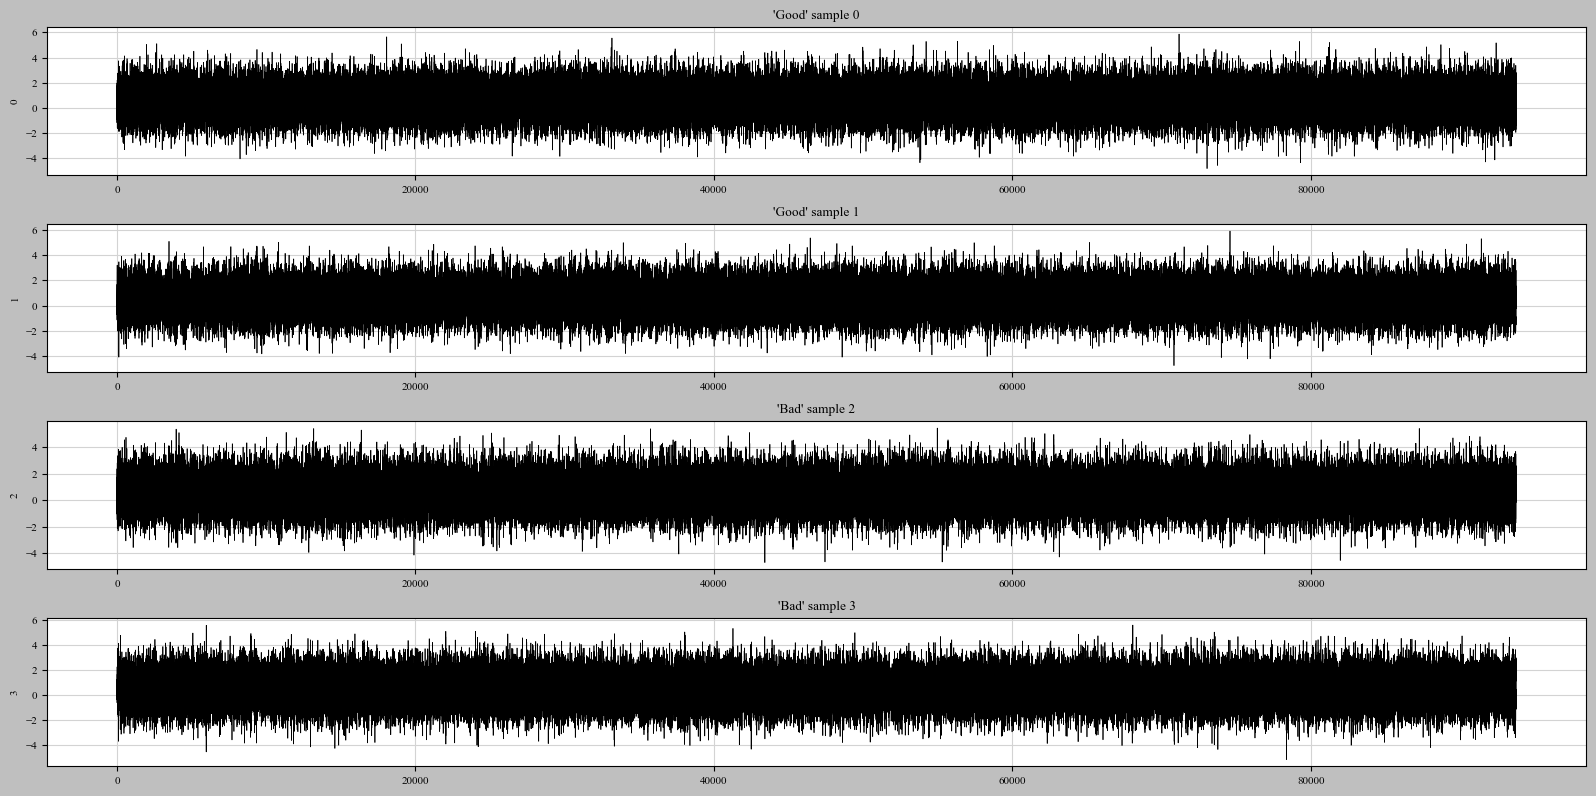

In [10]:
# Plot 2 'good' and 2 'bad' samples in a list using seaborn
good_samples = [0, 1]
bad_samples = [8, 9]

fig, axes = plt.subplots(4, 1, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    if i in good_samples:
        sns.lineplot(data=df.iloc[i], ax=ax)
        ax.set_title(f"'Good' sample {i}")
    else:
        sns.lineplot(data=df.iloc[i], ax=ax)
        ax.set_title(f"'Bad' sample {i}")

plt.tight_layout()


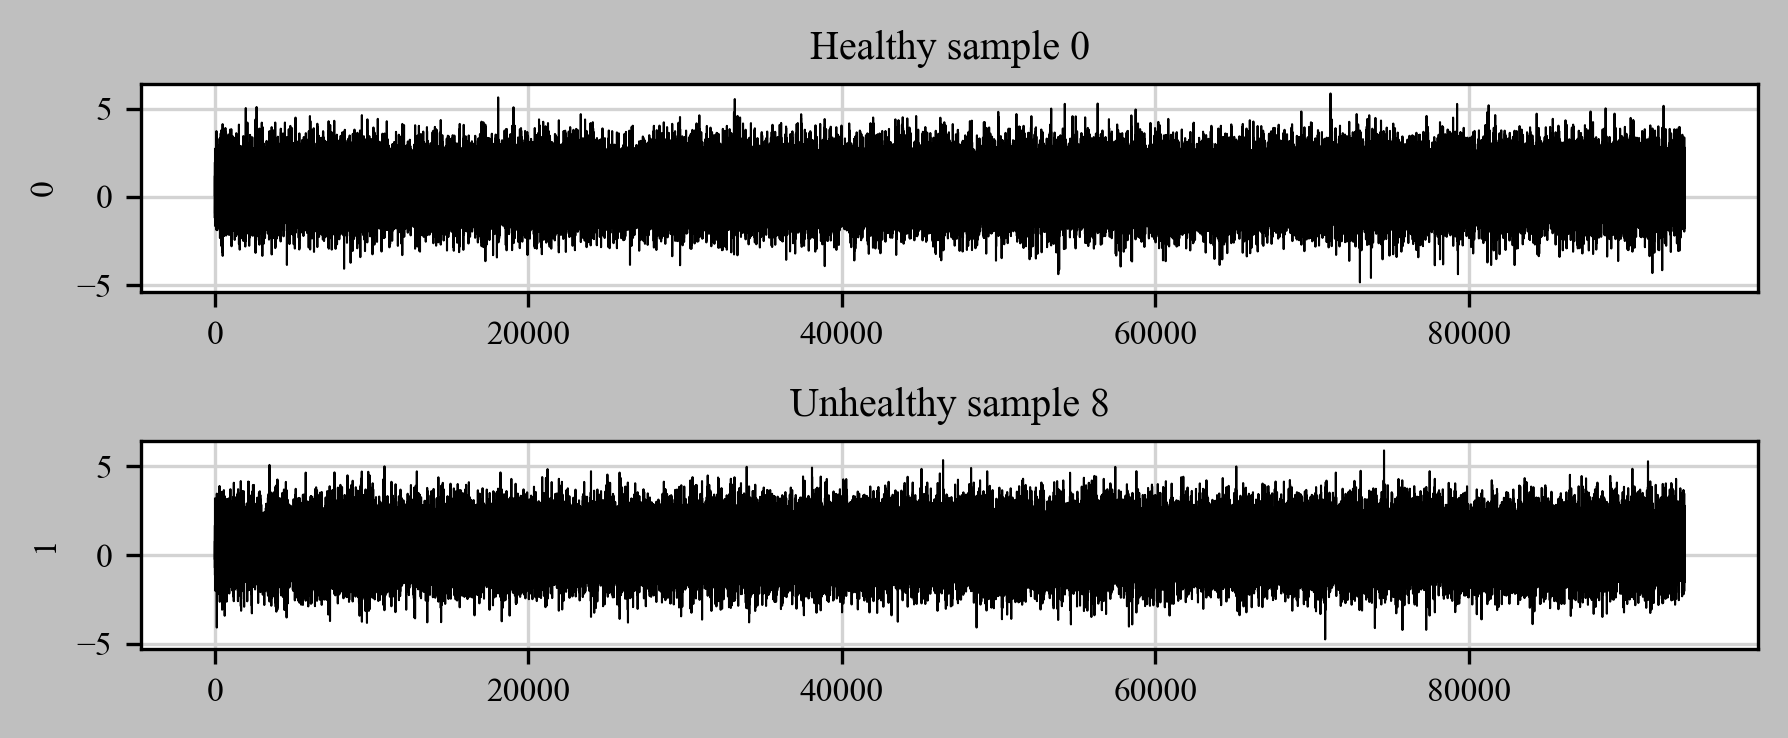

In [8]:
# Plot 1 healthy and 1 unhealthy sample in a list using seaborn
healthy_samples = [0]
unhealthy_samples = [8]

fig, axes = plt.subplots(2, 1, figsize=(6, 2.5), dpi = 300)

for i, ax in enumerate(axes.flatten()):
    if i in healthy_samples:
        sns.lineplot(data=df.iloc[i], ax=ax)
        ax.set_title(f"Healthy sample 0")
    else:
        sns.lineplot(data=df.iloc[i], ax=ax)
        ax.set_title(f"Unhealthy sample 8")

plt.tight_layout()
plt.show()

fig.savefig('healthy_unhealthy_samples.png', dpi=300)

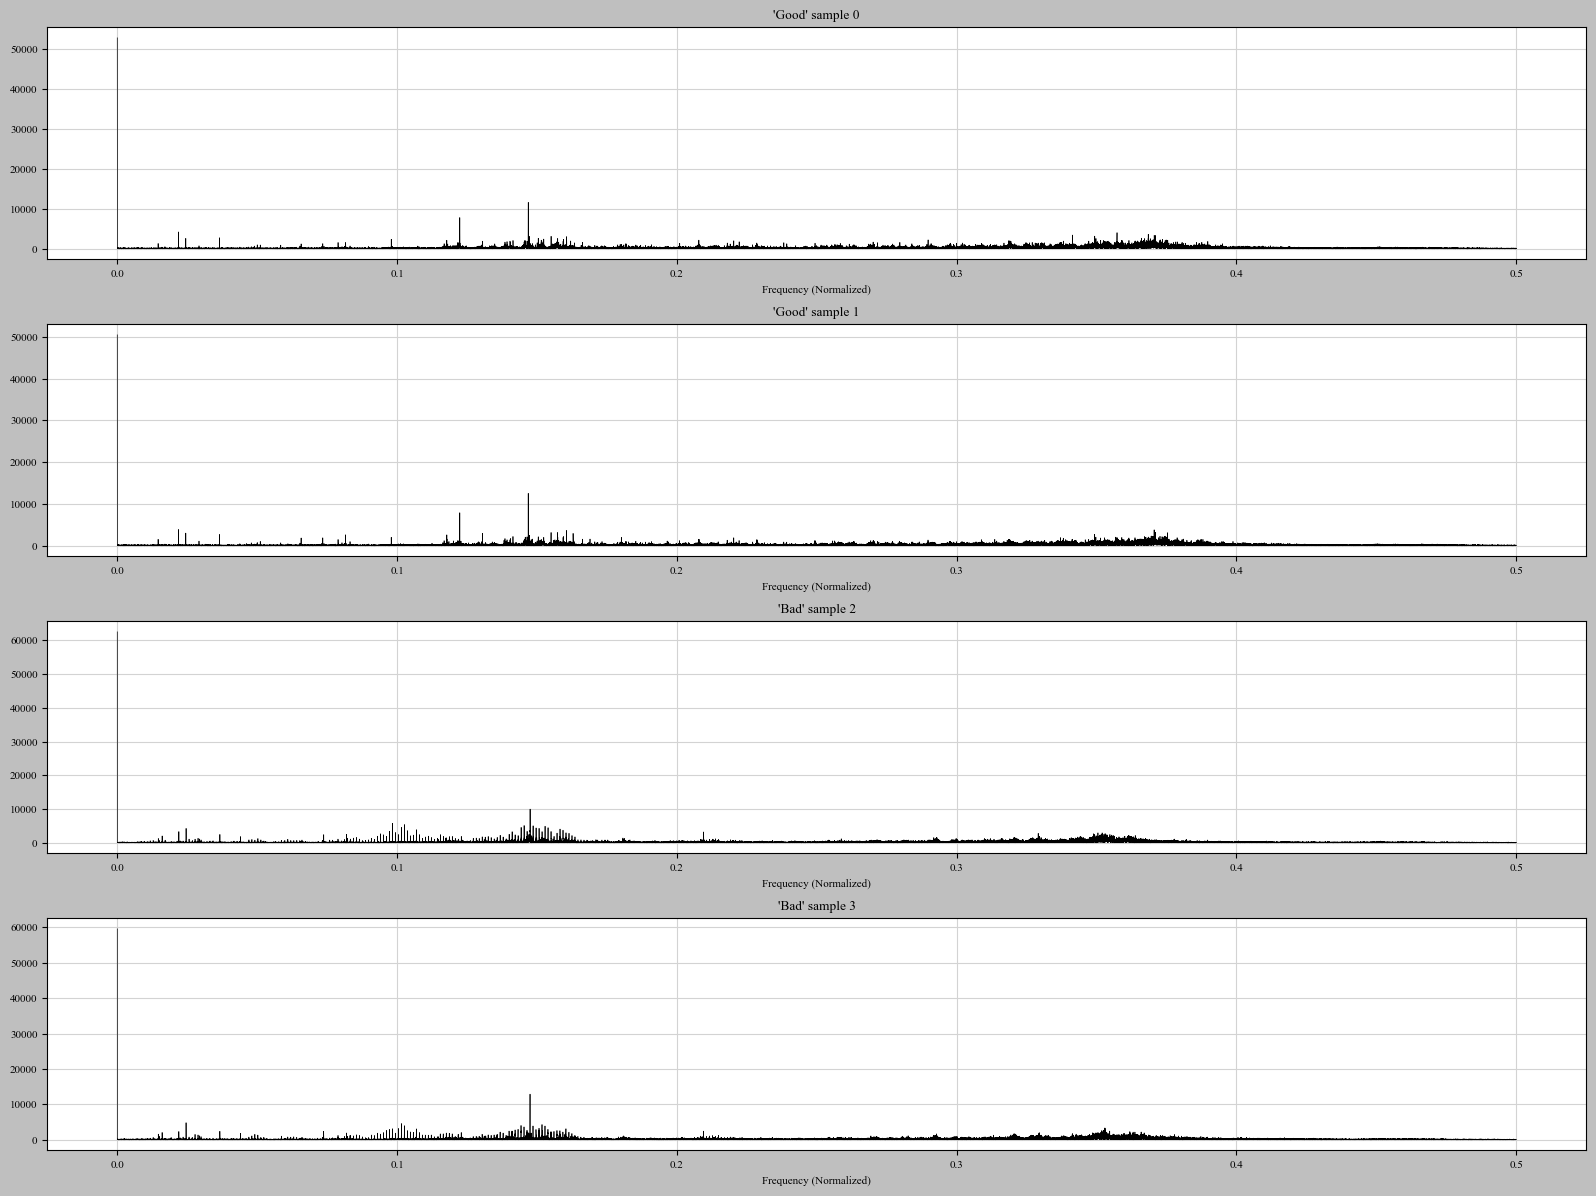

In [11]:
from scipy.fftpack import fft, fftfreq

def plot_fft(x, y, ax):
    ax.plot(x[:len(x)//2], y[:len(y)//2])
    ax.set_xlabel('Frequency (Normalized)')
    

# Compute the Fast Fourier Transform for good and bad samples with normalized frequencies
good_fft = np.abs(fft(df.iloc[good_samples], axis=1))
bad_fft = np.abs(fft(df.iloc[bad_samples], axis=1))

good_freqs = fftfreq(df.shape[1])
bad_freqs = fftfreq(df.shape[1])

fig, axes = plt.subplots(4, 1, figsize=(16, 12))

for i, ax in enumerate(axes.flatten()):
    if i in good_samples:
        plot_fft(good_freqs, good_fft[i%2], ax)
        ax.set_title(f"'Good' sample {i}")
    else:
        plot_fft(bad_freqs, bad_fft[i%2], ax)
        ax.set_title(f"'Bad' sample {i}")

plt.tight_layout()
plt.show()

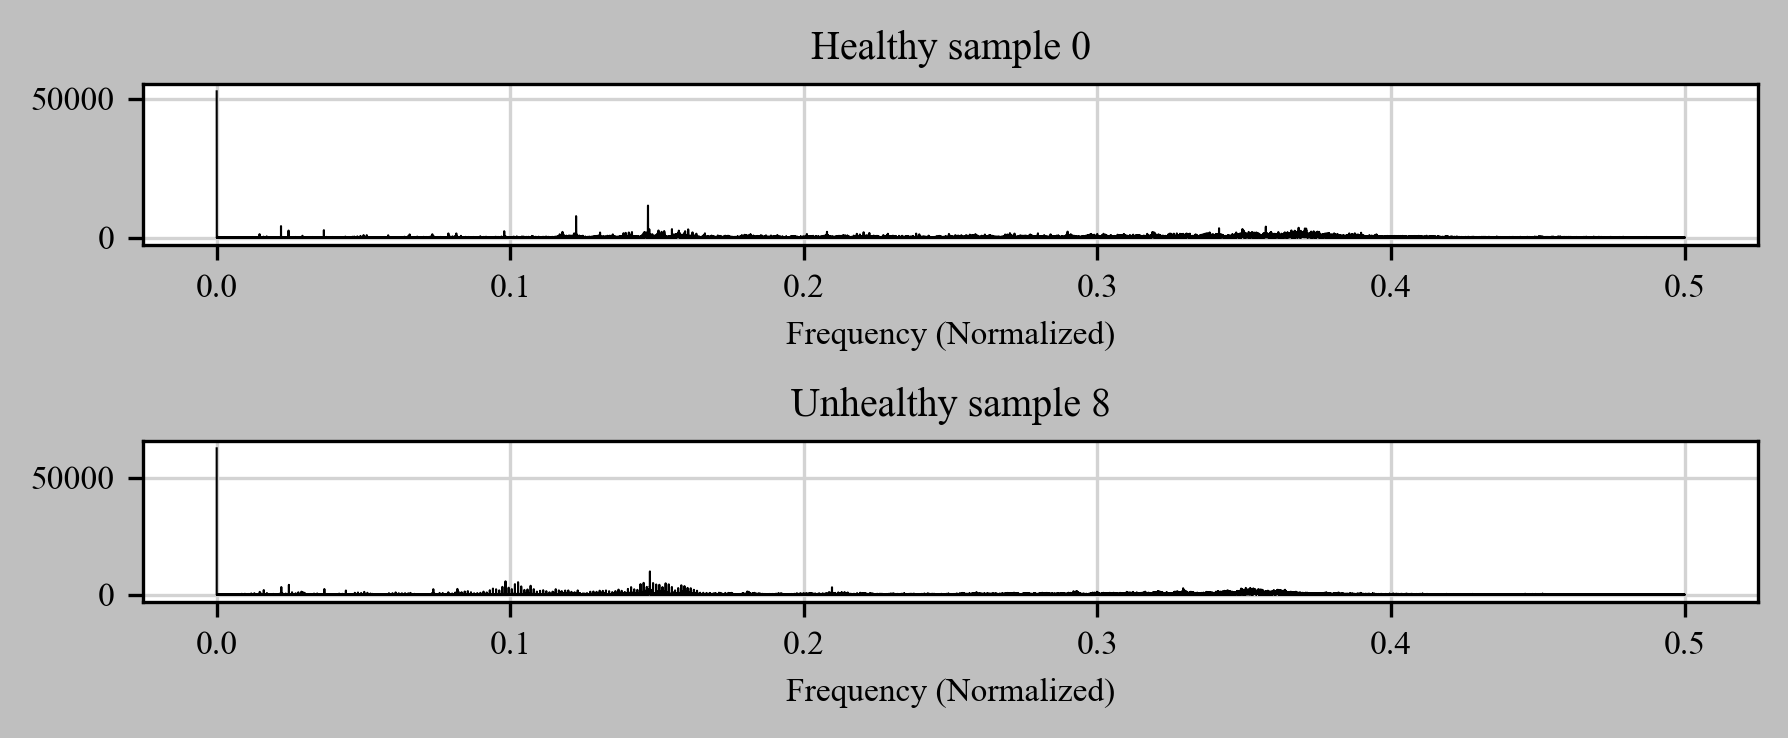

In [13]:
# Plot fft for healthy and unhealthy samples
healthy_fft = np.abs(fft(df.iloc[healthy_samples], axis=1))
unhealthy_fft = np.abs(fft(df.iloc[unhealthy_samples], axis=1))

healthy_freqs = fftfreq(df.shape[1])
unhealthy_freqs = fftfreq(df.shape[1])

fig, axes = plt.subplots(2, 1, figsize=(6, 2.5), dpi=300)

for i, ax in enumerate(axes.flatten()):
    if i in healthy_samples:
        plot_fft(healthy_freqs, healthy_fft[0], ax)
        ax.set_title(f"Healthy sample 0")
    else:
        plot_fft(unhealthy_freqs, unhealthy_fft[0], ax)
        ax.set_title(f"Unhealthy sample 8")

plt.tight_layout()
plt.show()

fig.savefig('healthy_unhealthy_samples_fft.png', dpi=300)

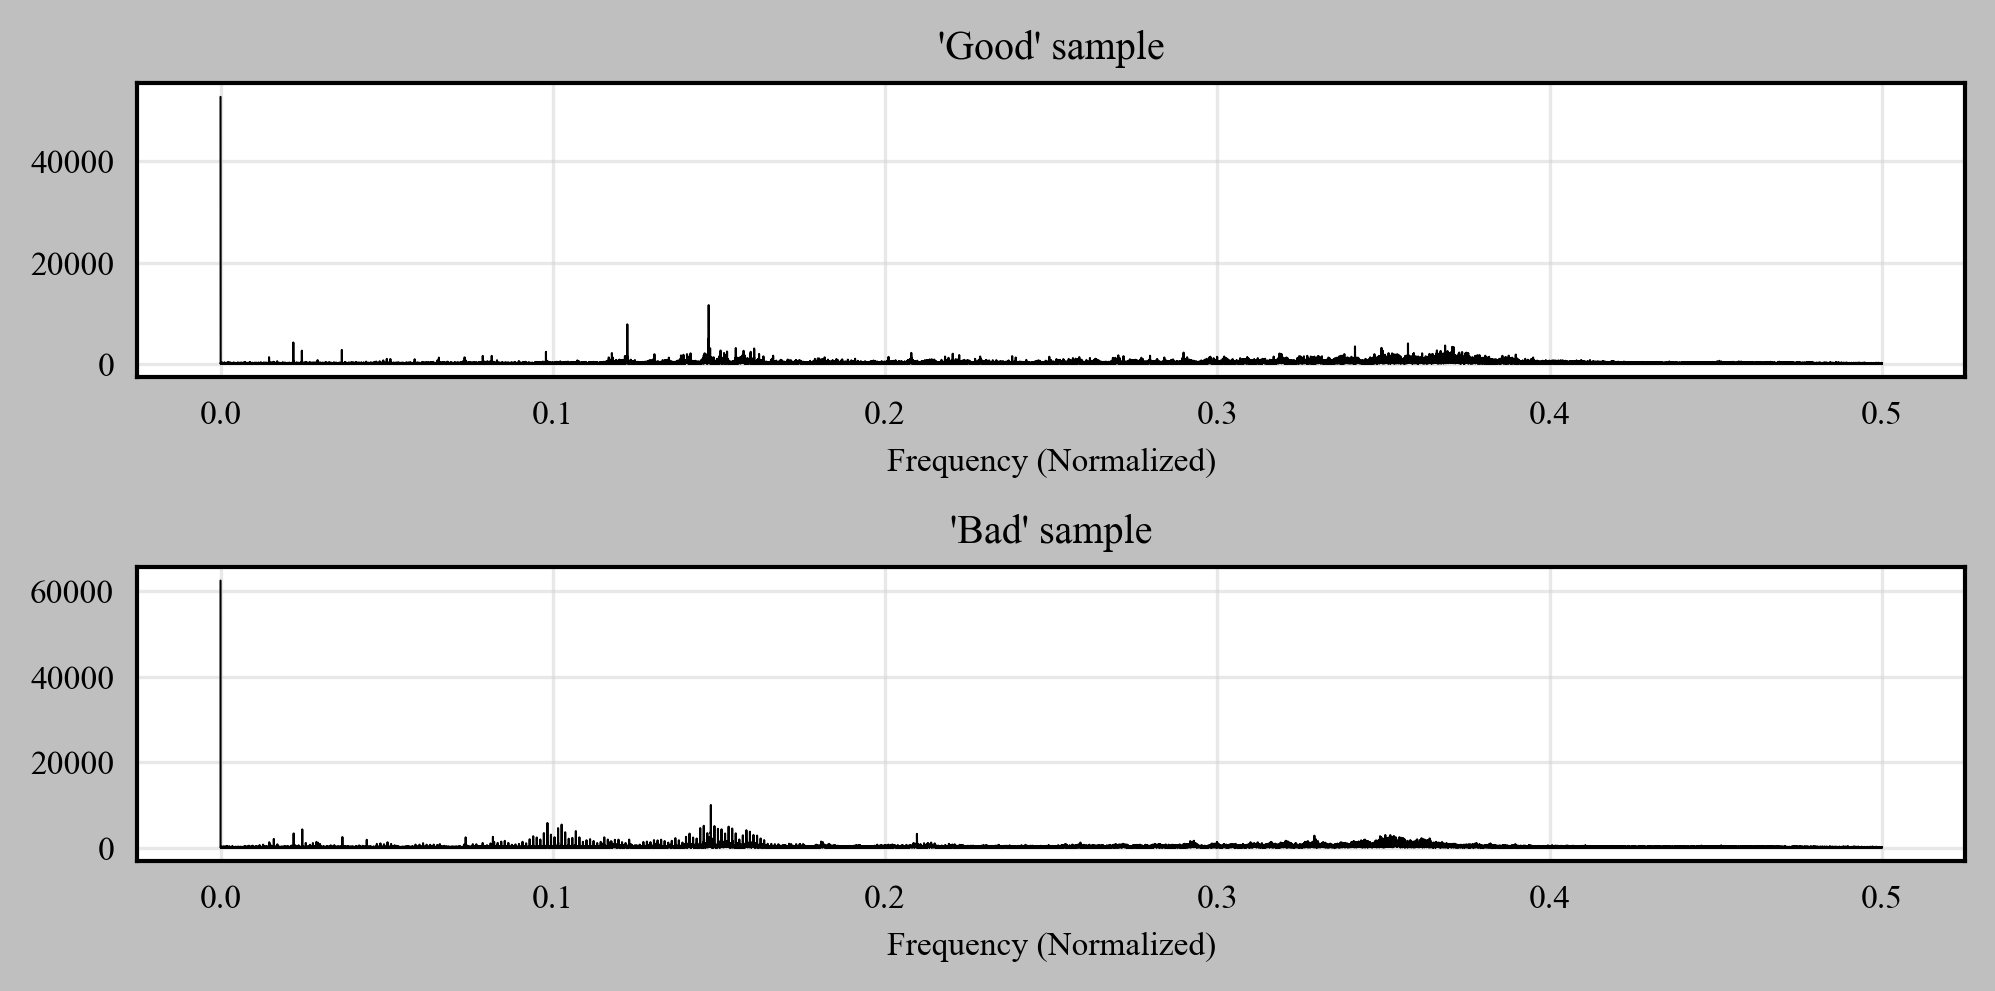

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(6.69, 6.69/2), dpi=300)

ax = axes[0]
plot_fft(good_freqs, good_fft[0], ax)
ax.set_title(f"'Good' sample")

ax = axes[1]
plot_fft(bad_freqs, bad_fft[0], ax)
ax.set_title(f"'Bad' sample")

plt.tight_layout()
plt.show()

# Save as tif file
fig.savefig('Fig_1.tif', format='tif', dpi=300)

We apply to the source sample signals these techniques:
1. Detranding;
2. Window function;
3. Zero-padding.

Then we use FFT again and compare the results.

In [14]:
# Original data

from scipy.signal import get_window, detrend


good_signals = df.iloc[good_samples].copy()
bad_signals = df.iloc[bad_samples].copy()

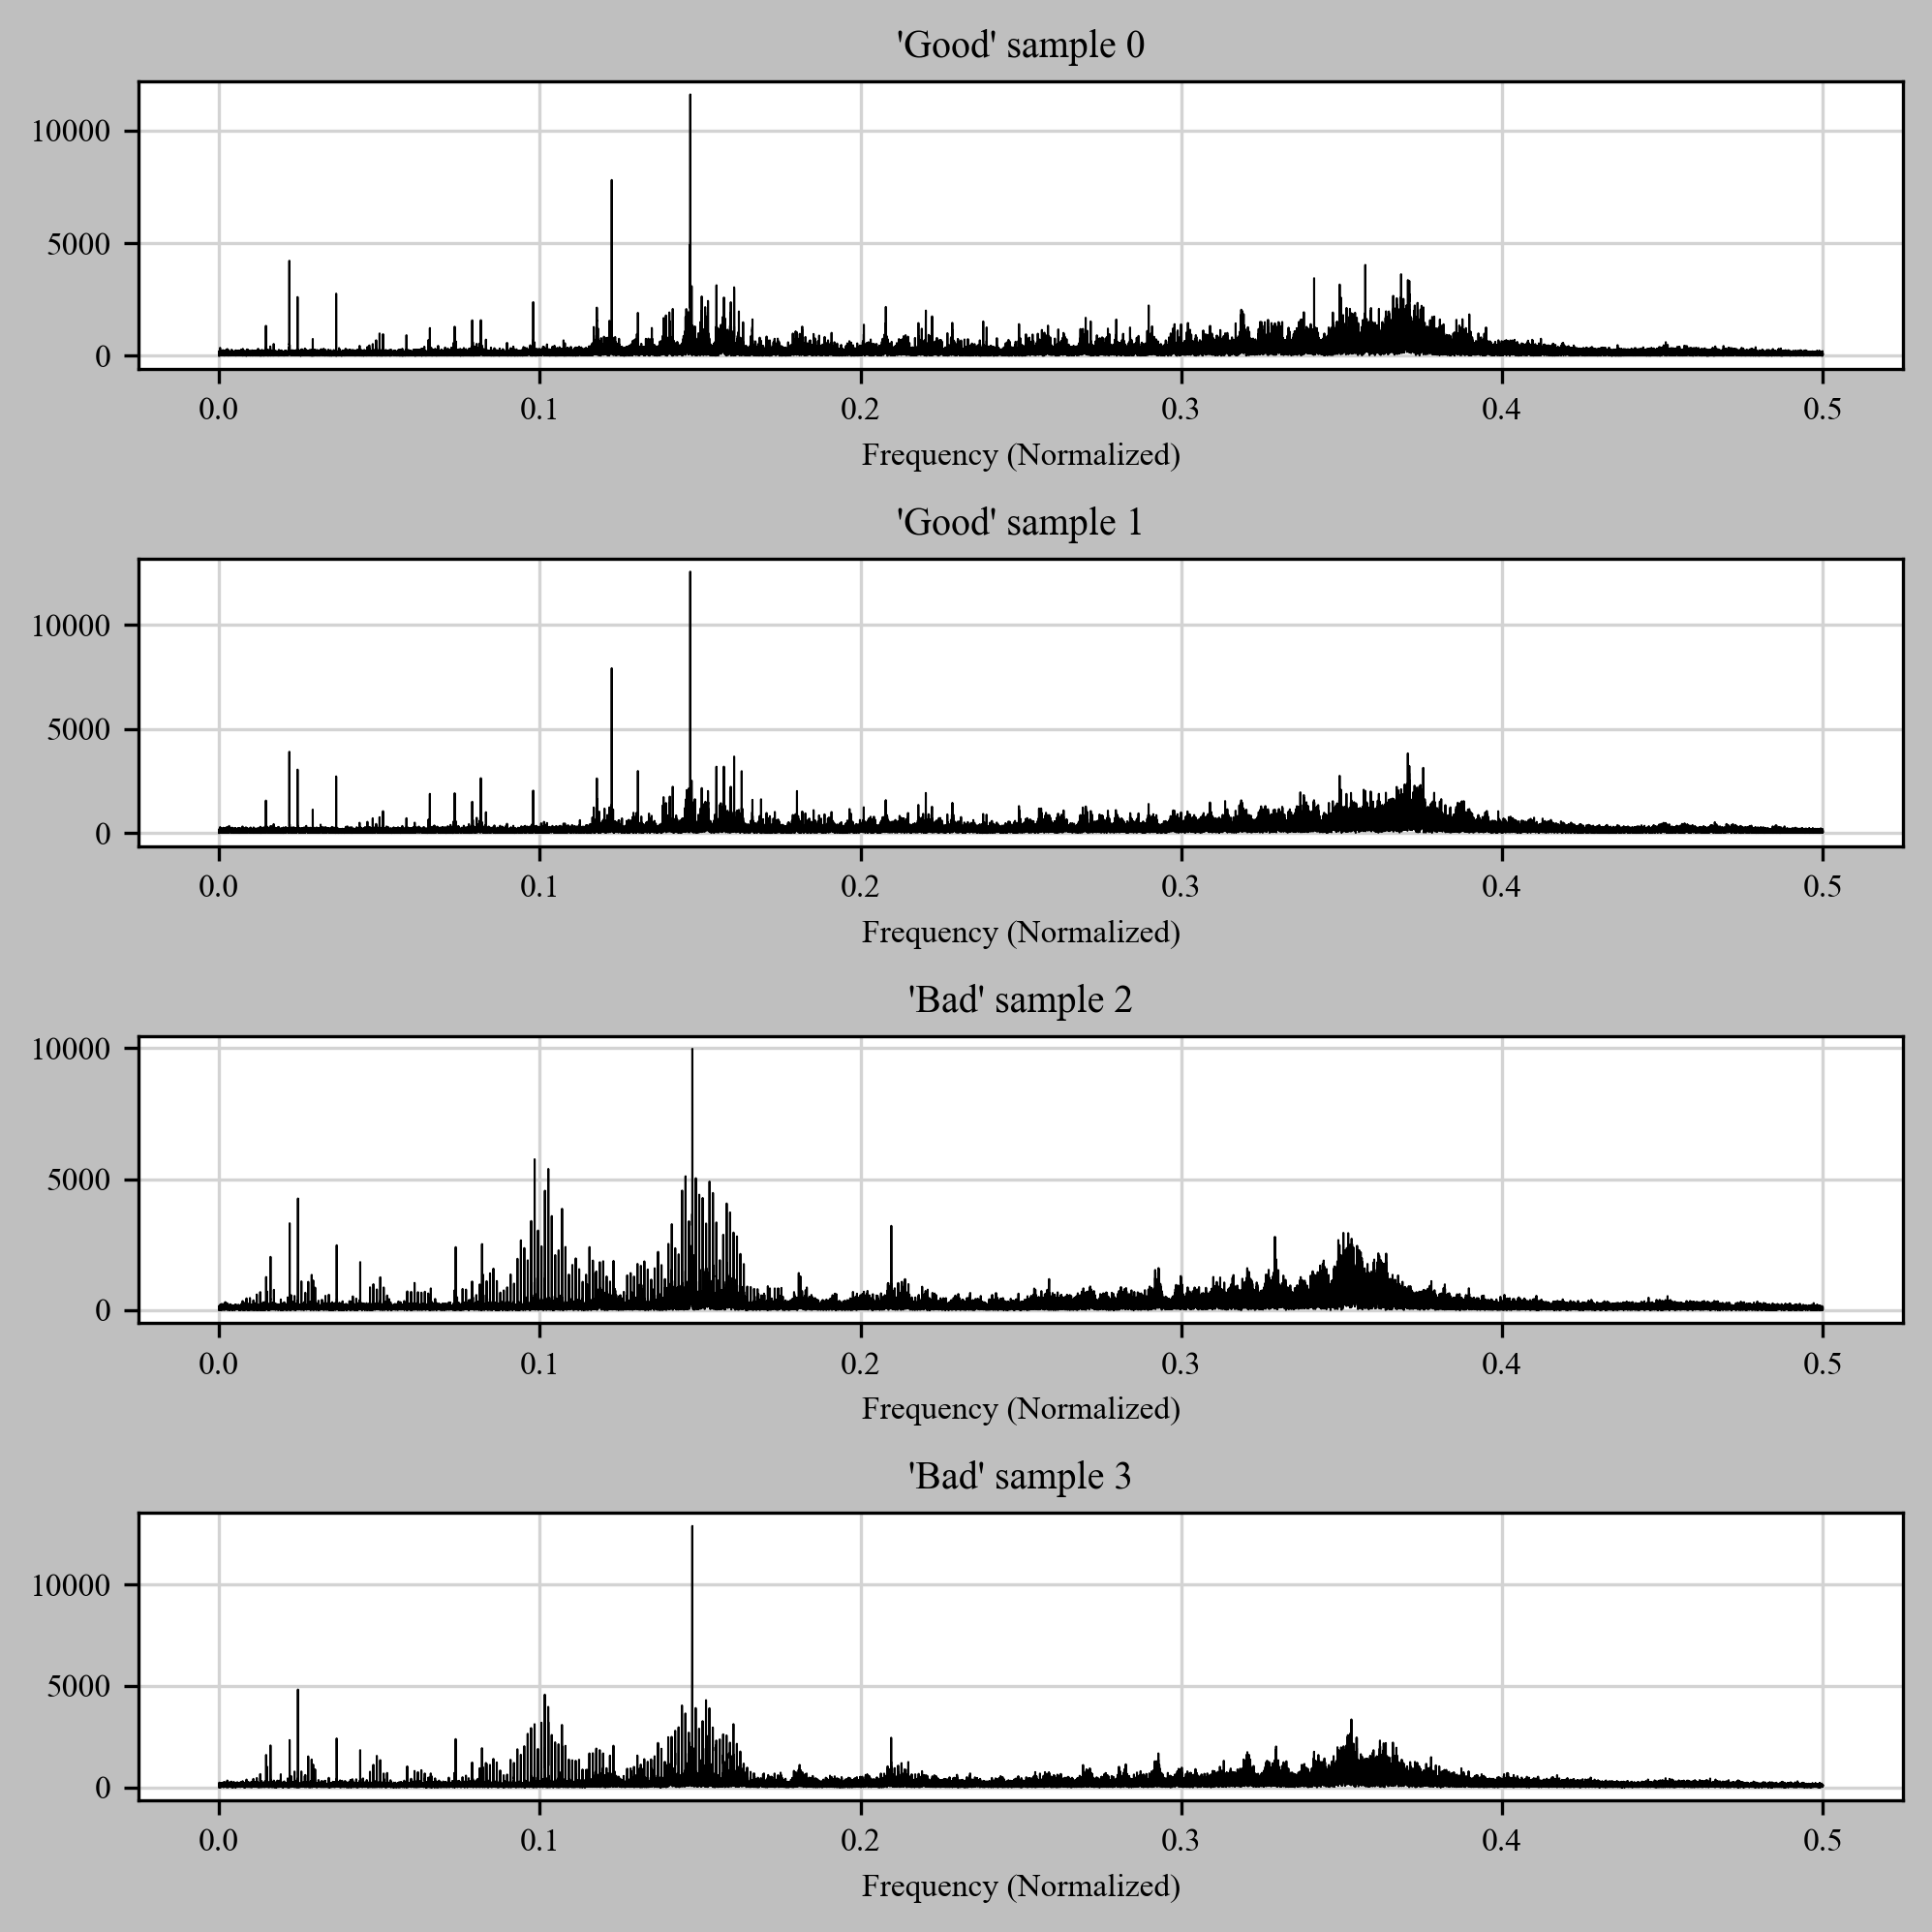

In [15]:
# 1. Detrend the signals

good_signals = detrend(good_signals)
bad_signals = detrend(bad_signals)

good_fft = np.abs(fft(good_signals, axis=1))
bad_fft = np.abs(fft(bad_signals, axis=1))

good_freqs = fftfreq(df.shape[1])
bad_freqs = fftfreq(df.shape[1])

fig, axes = plt.subplots(4, 1, figsize=(6.69, 6.69), dpi=300)

for i, ax in enumerate(axes.flatten()):
    if i in good_samples:
        plot_fft(good_freqs, good_fft[i%2], ax)
        ax.set_title(f"'Good' sample {i}")
    else:
        plot_fft(bad_freqs, bad_fft[i%2], ax)
        ax.set_title(f"'Bad' sample {i}")

plt.tight_layout()
plt.show()

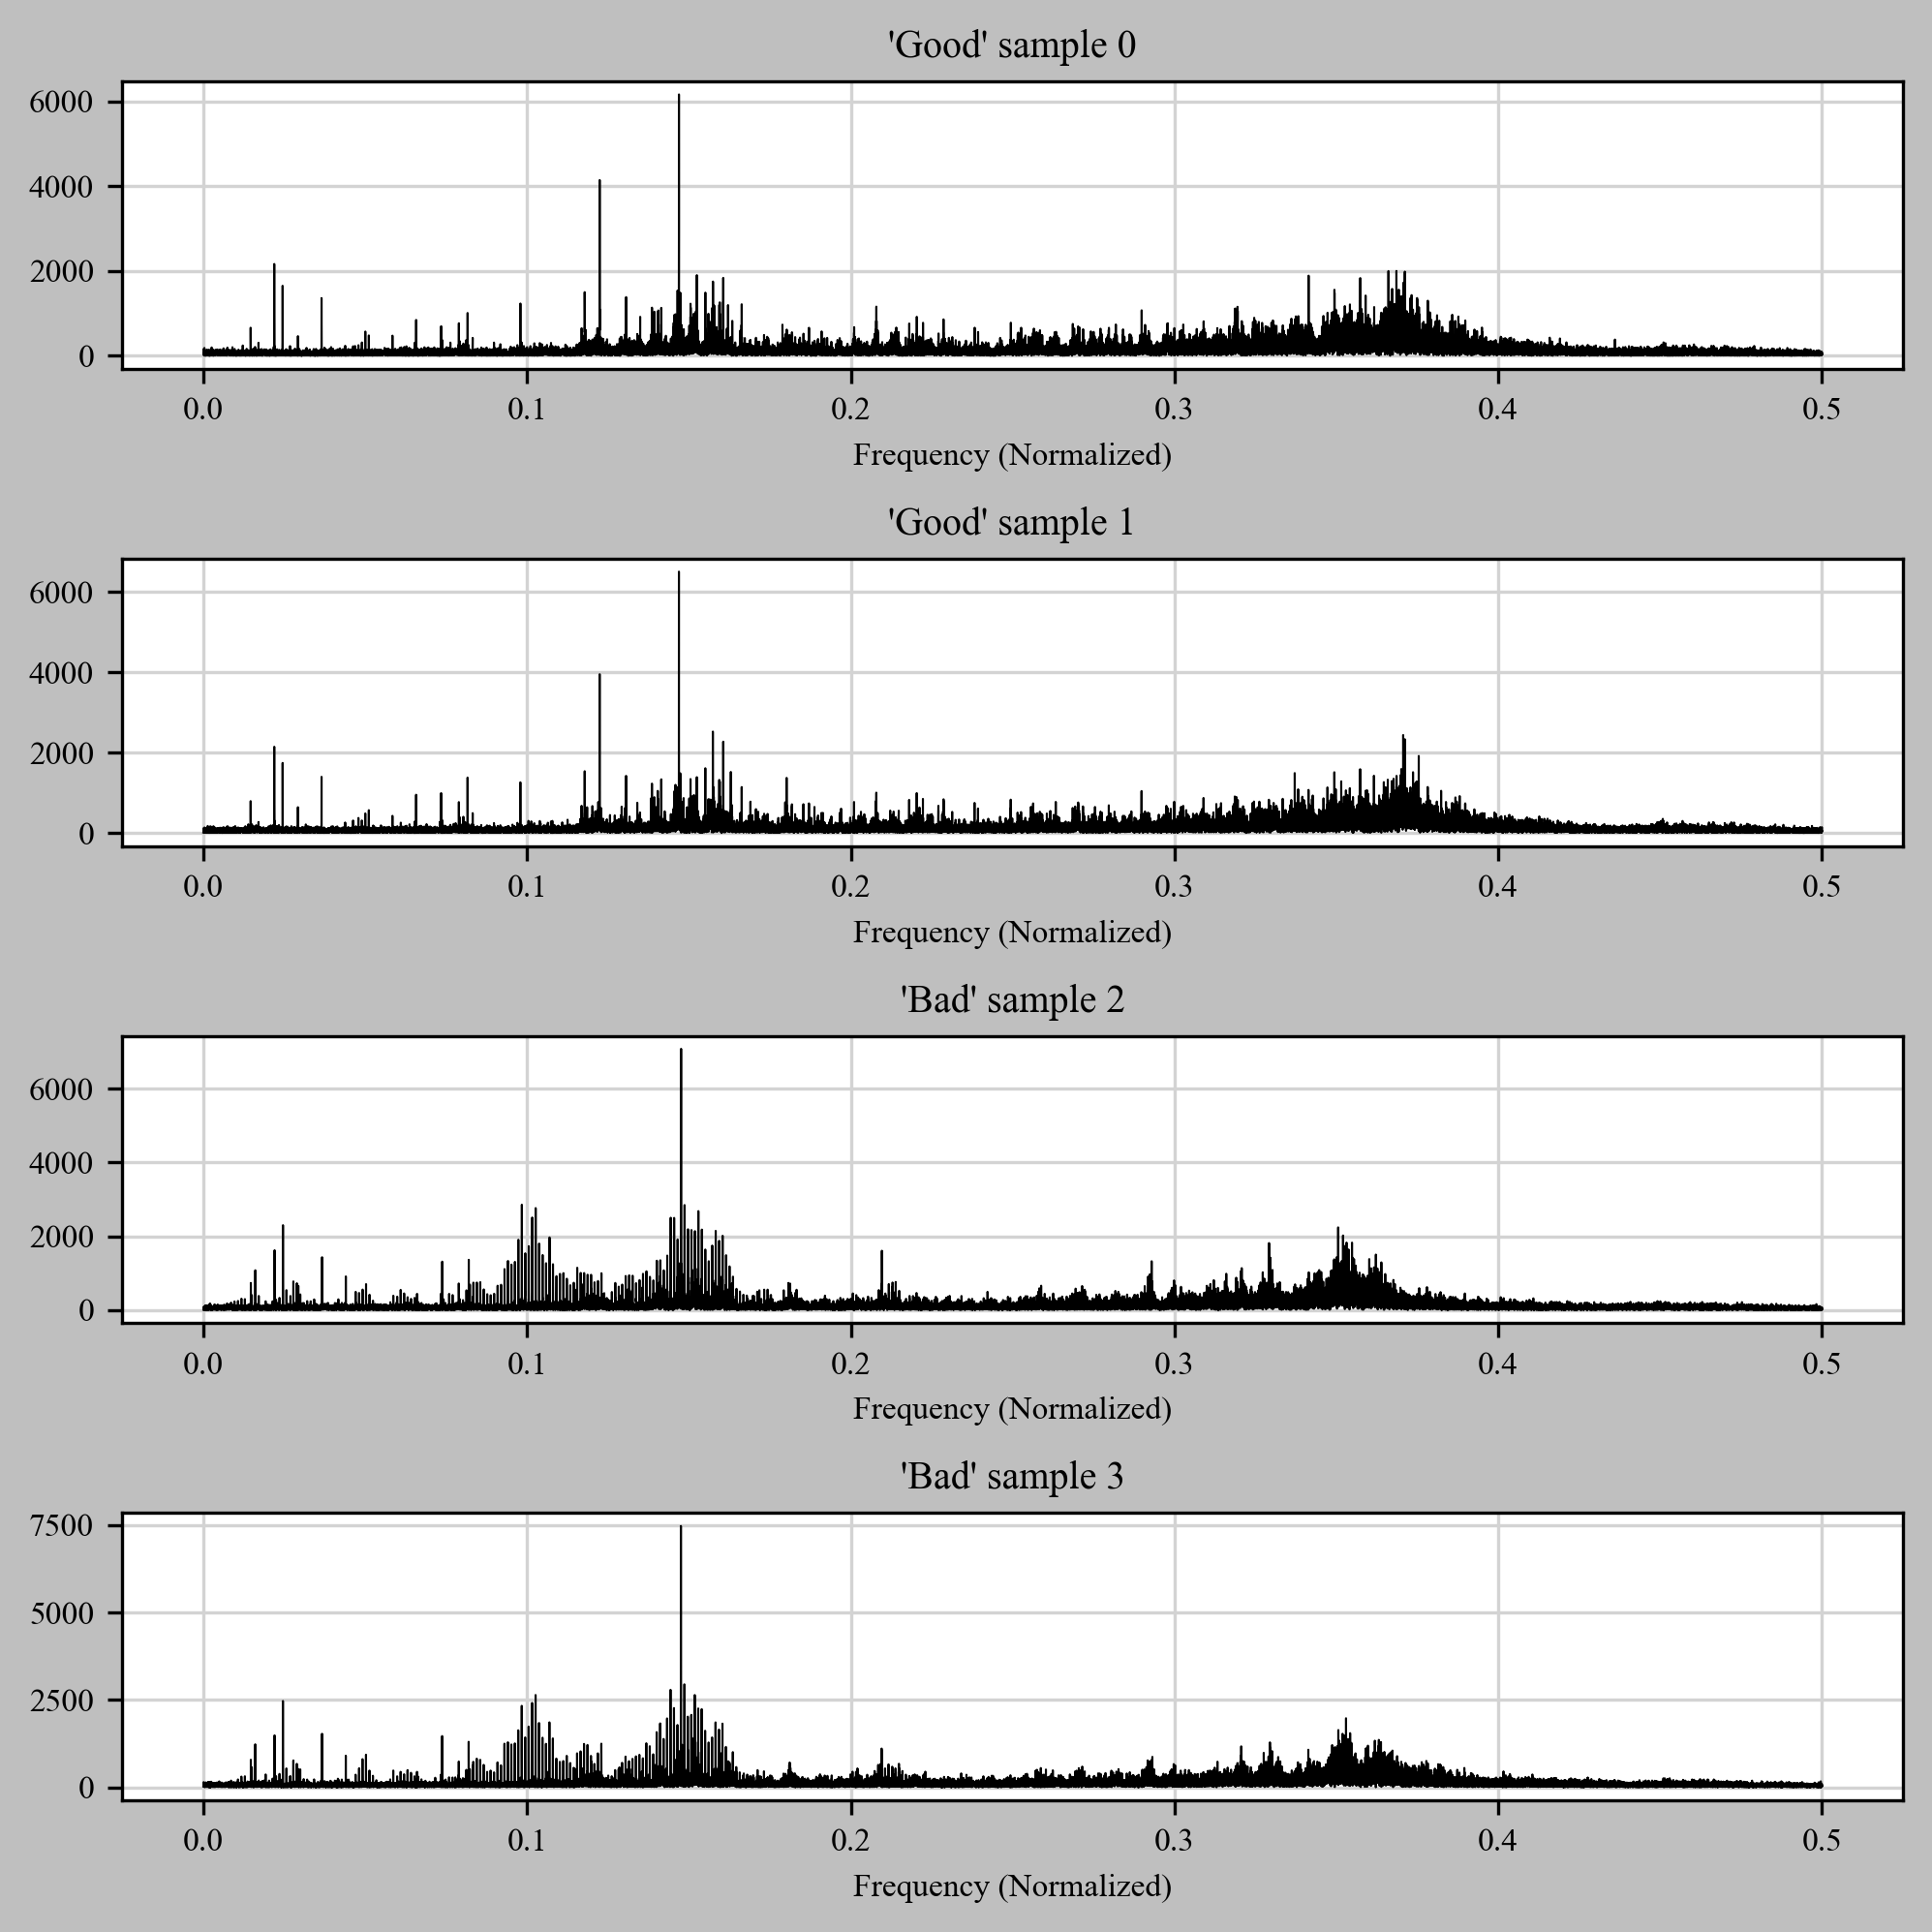

In [16]:
# 2. Apply a window function to the signals

window = get_window('hann', df.shape[1])

good_signals = good_signals * window
bad_signals = bad_signals * window

good_fft = np.abs(fft(good_signals, axis=1))
bad_fft = np.abs(fft(bad_signals, axis=1))

good_freqs = fftfreq(df.shape[1])
bad_freqs = fftfreq(df.shape[1])

fig, axes = plt.subplots(4, 1, figsize=(6.69, 6.69), dpi=300)

for i, ax in enumerate(axes.flatten()):
    if i in good_samples:
        plot_fft(good_freqs, good_fft[i%2], ax)
        ax.set_title(f"'Good' sample {i}")
    else:
        plot_fft(bad_freqs, bad_fft[i%2], ax)
        ax.set_title(f"'Bad' sample {i}")

plt.tight_layout()
plt.show()

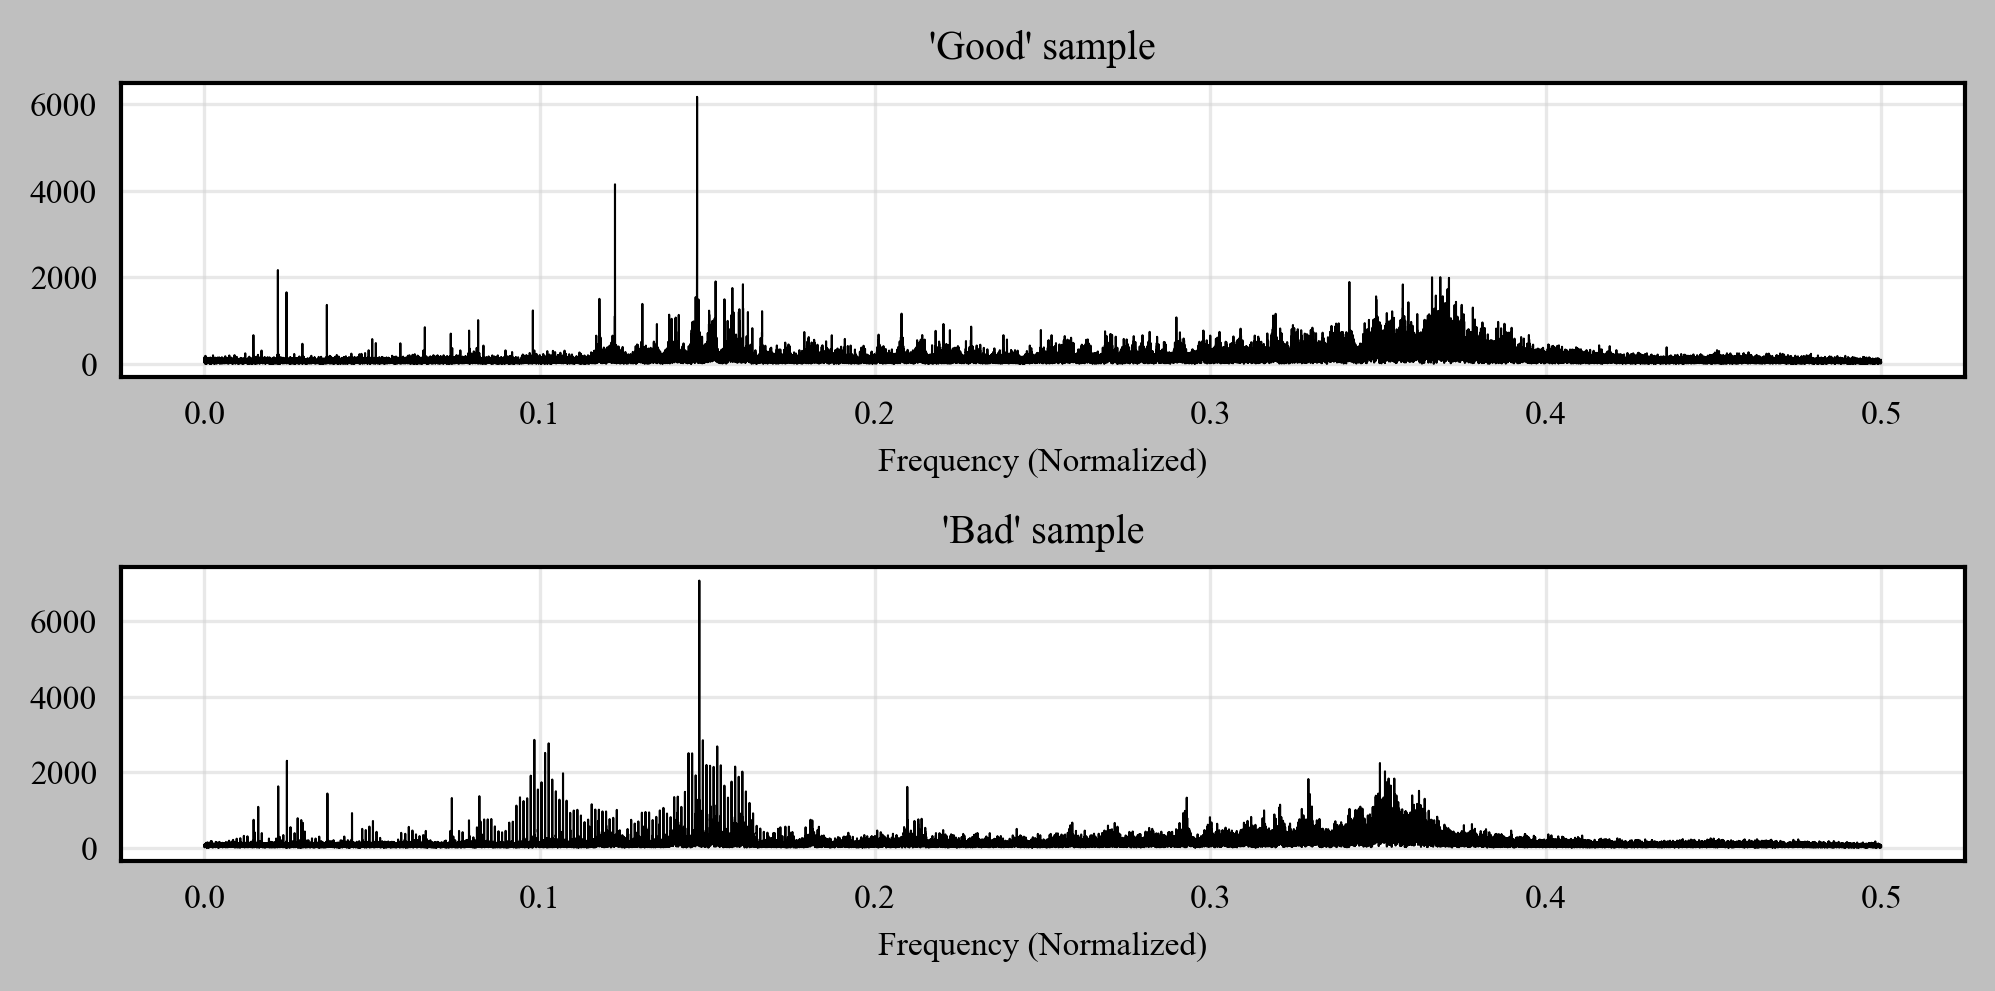

In [50]:
fig, axes = plt.subplots(2, 1, figsize=(6.69, 6.69/2), dpi=300)

ax = axes[0]
plot_fft(good_freqs, good_fft[0], ax)
ax.set_title(f"'Good' sample")

ax = axes[1]
plot_fft(bad_freqs, bad_fft[0], ax)
ax.set_title(f"'Bad' sample")

plt.tight_layout()
plt.show()

# Save as tif file
fig.savefig('Fig_2.tif', format='tif', dpi=300)

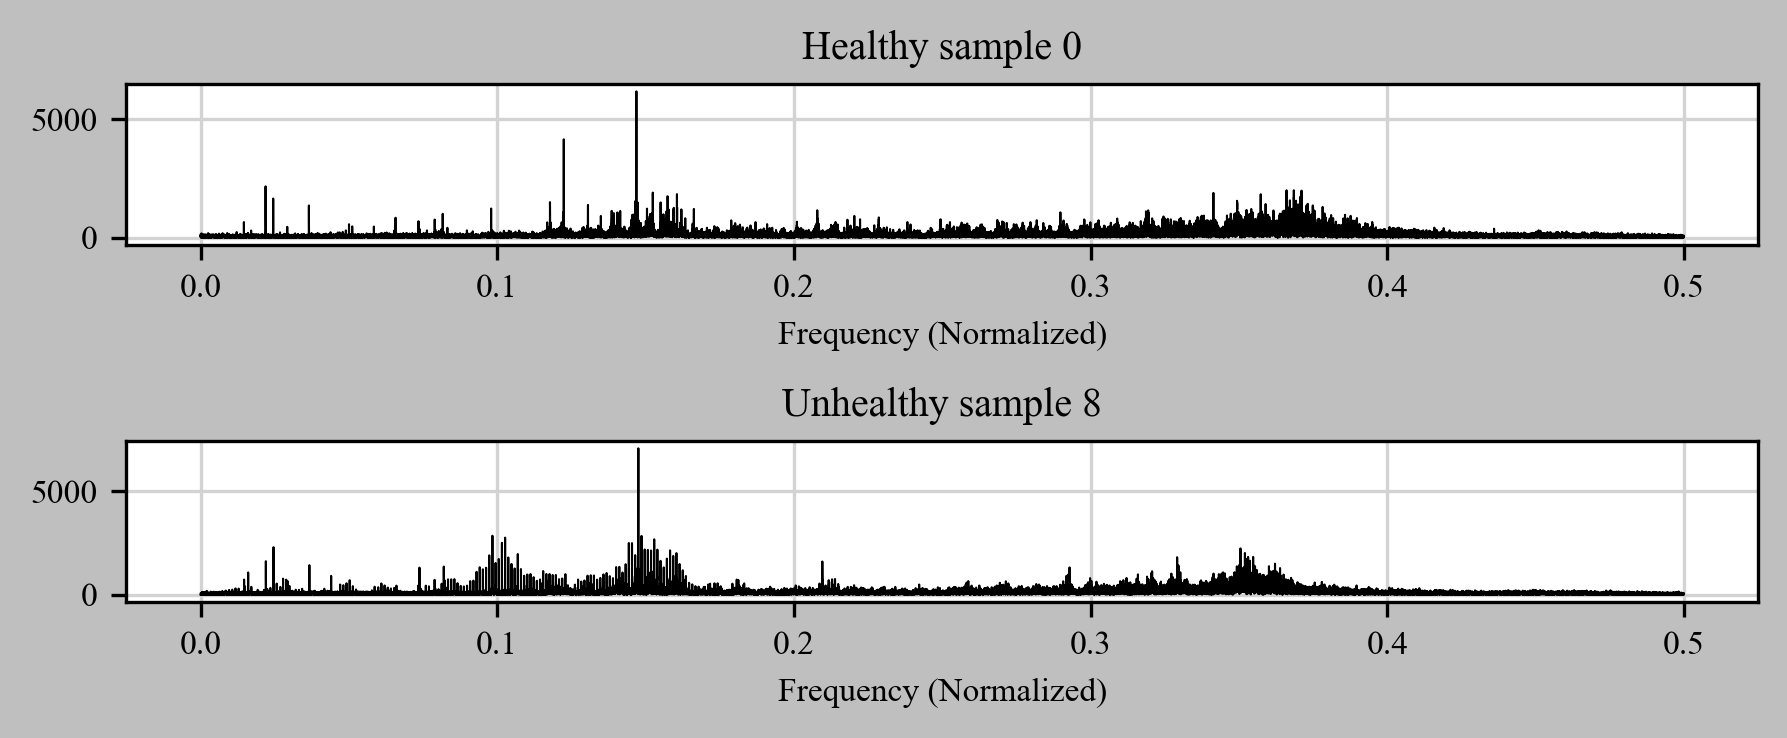

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(6, 2.5), dpi=300)

ax = axes[0]
plot_fft(good_freqs, good_fft[0], ax)
ax.set_title(f"Healthy sample 0")

ax = axes[1]
plot_fft(bad_freqs, bad_fft[0], ax)
ax.set_title(f"Unhealthy sample 8")

plt.tight_layout()
plt.show()

fig.savefig('healthy_unhealthy_samples_fft_windowed.png', dpi=300)

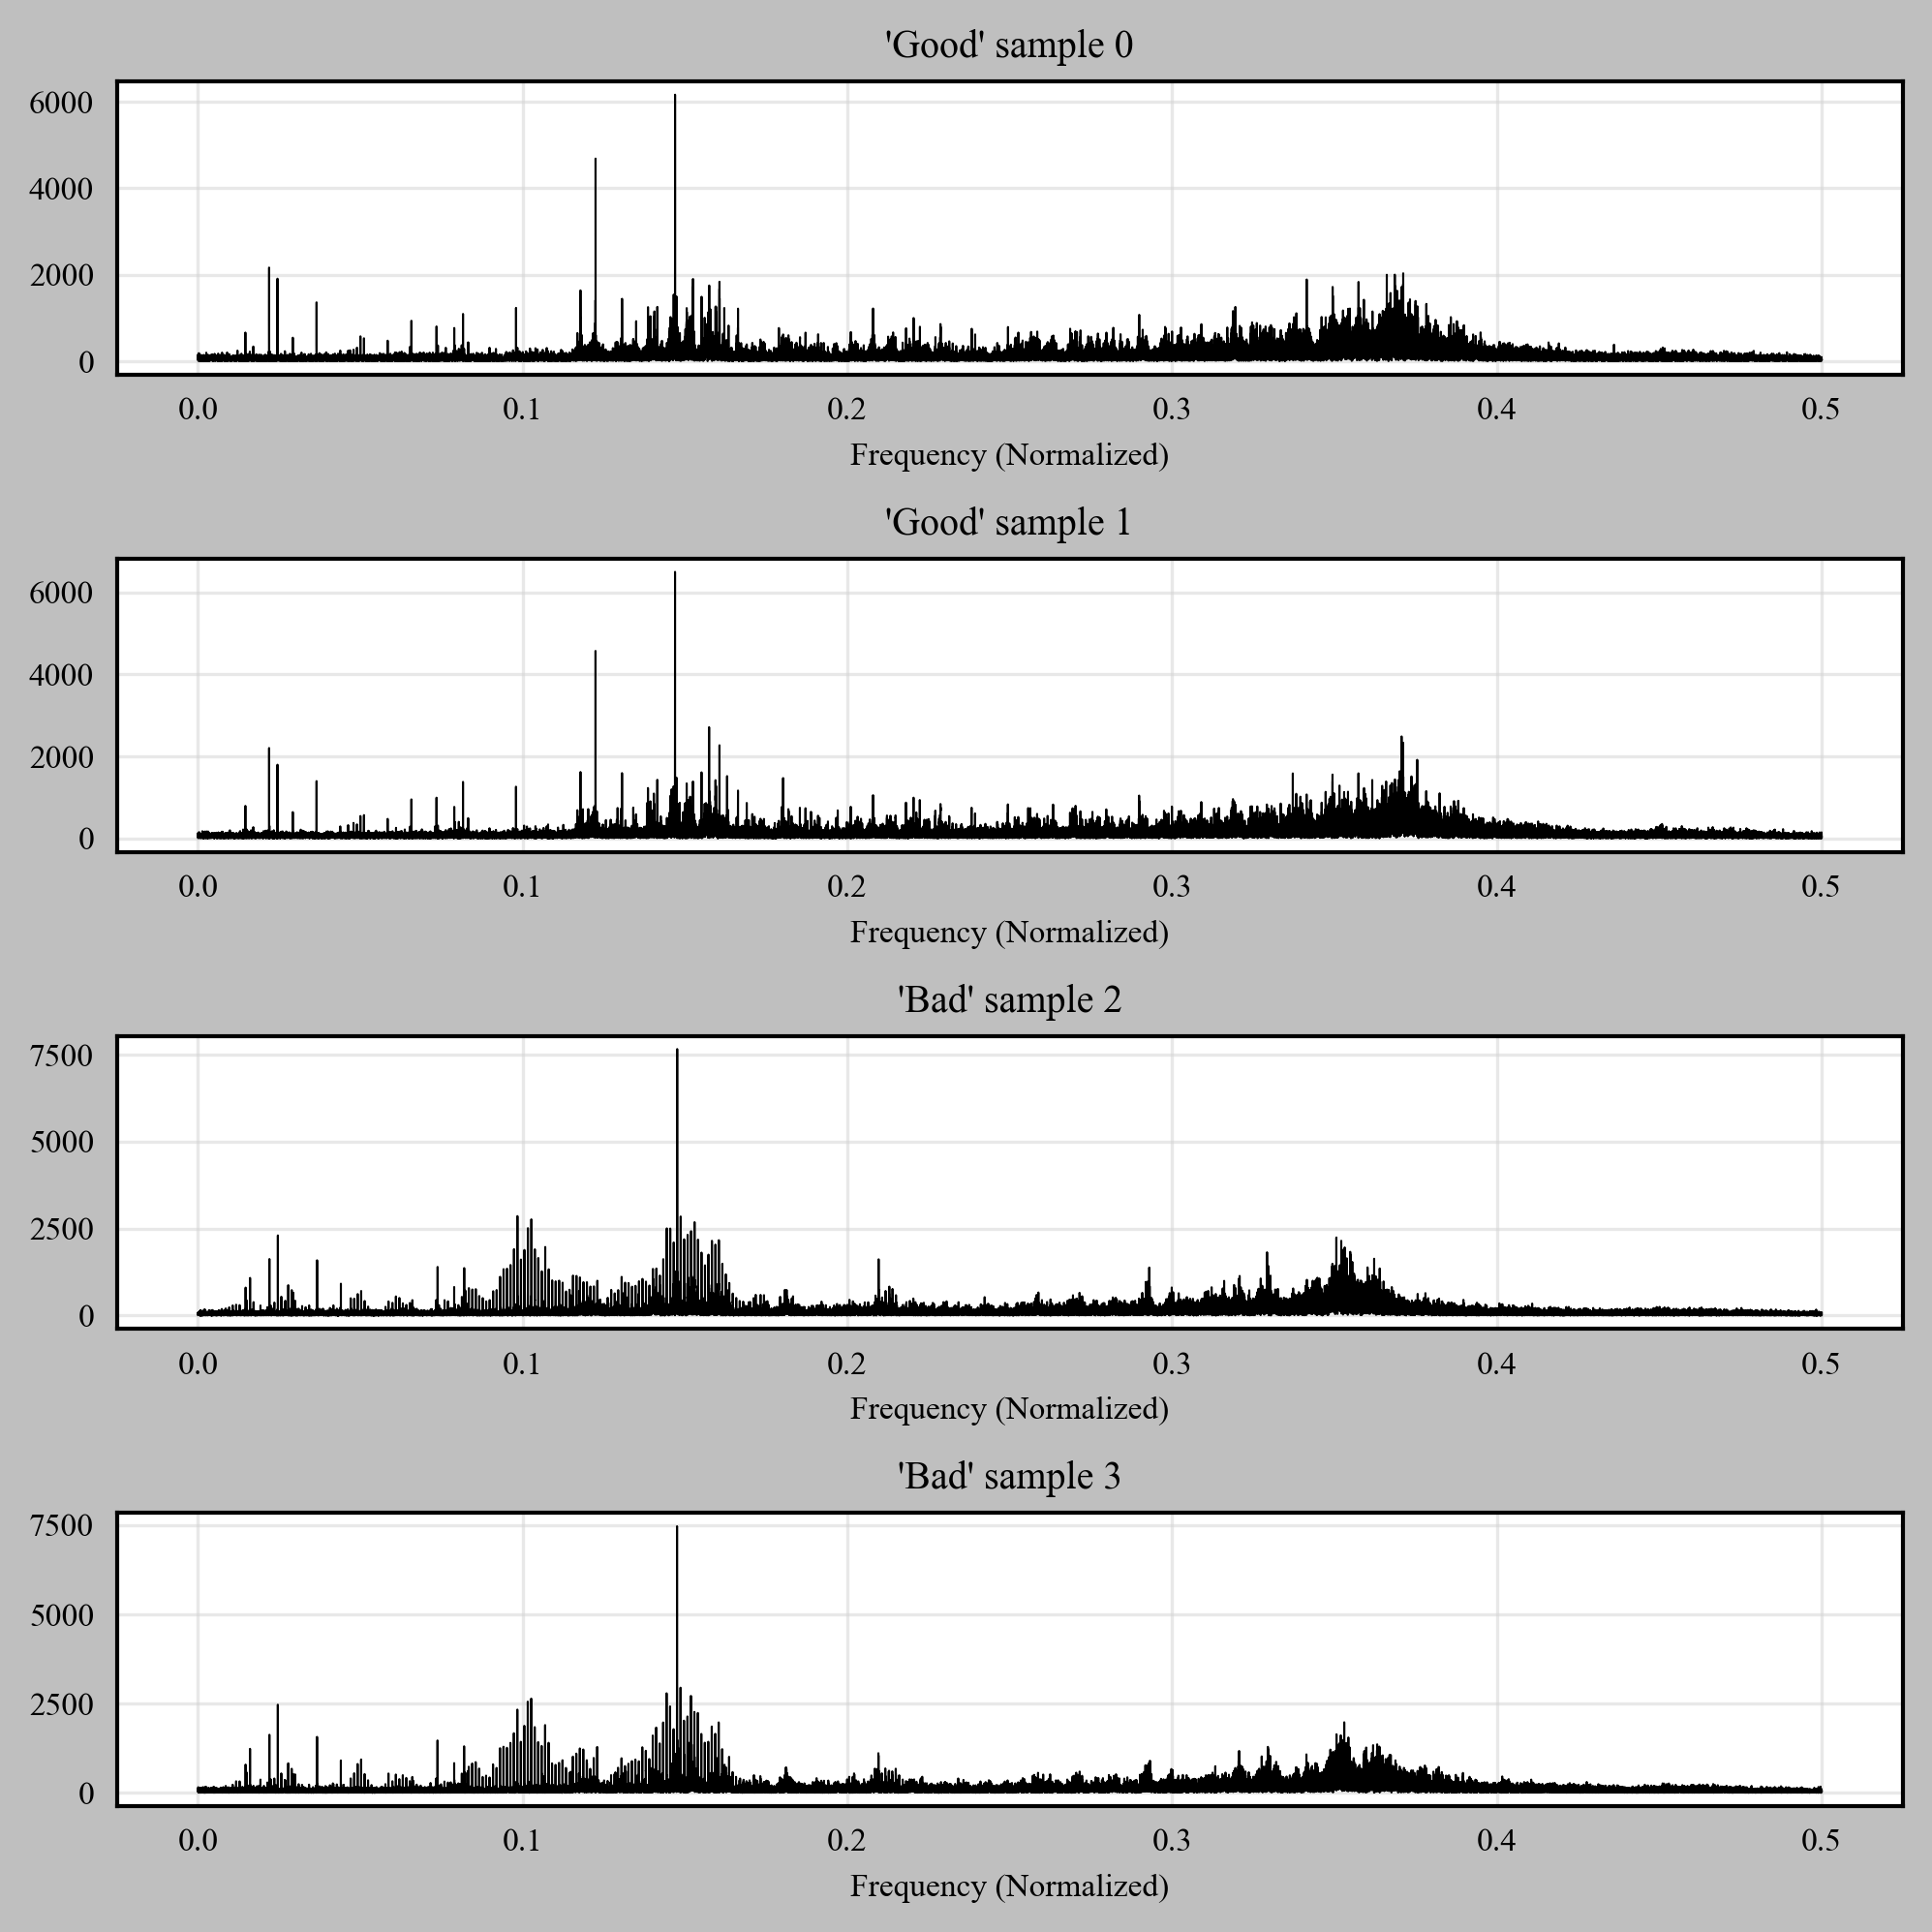

In [51]:
# 3. Zero-pad the signals

# Assuming df.shape[1] gives the original length of the signals
original_length = df.shape[1]
padded_length = 2 * original_length

# Zero-padding to double the resolution
good_signals = np.pad(good_signals, ((0, 0), (0, padded_length - original_length)), mode='constant')
bad_signals = np.pad(bad_signals, ((0, 0), (0, padded_length - original_length)), mode='constant')

# Compute FFT
good_fft = np.abs(fft(good_signals, axis=1))
bad_fft = np.abs(fft(bad_signals, axis=1))

# Compute frequency bins
good_freqs = fftfreq(padded_length)
bad_freqs = fftfreq(padded_length)

# Plotting
fig, axes = plt.subplots(4, 1, figsize=(6.69, 6.69), dpi=300)

for i, ax in enumerate(axes.flatten()):
    if i in good_samples:
        plot_fft(good_freqs, good_fft[i % 2], ax)
        ax.set_title(f"'Good' sample {i}")
    else:
        plot_fft(bad_freqs, bad_fft[i % 2], ax)
        ax.set_title(f"'Bad' sample {i}")

plt.tight_layout()
plt.show()

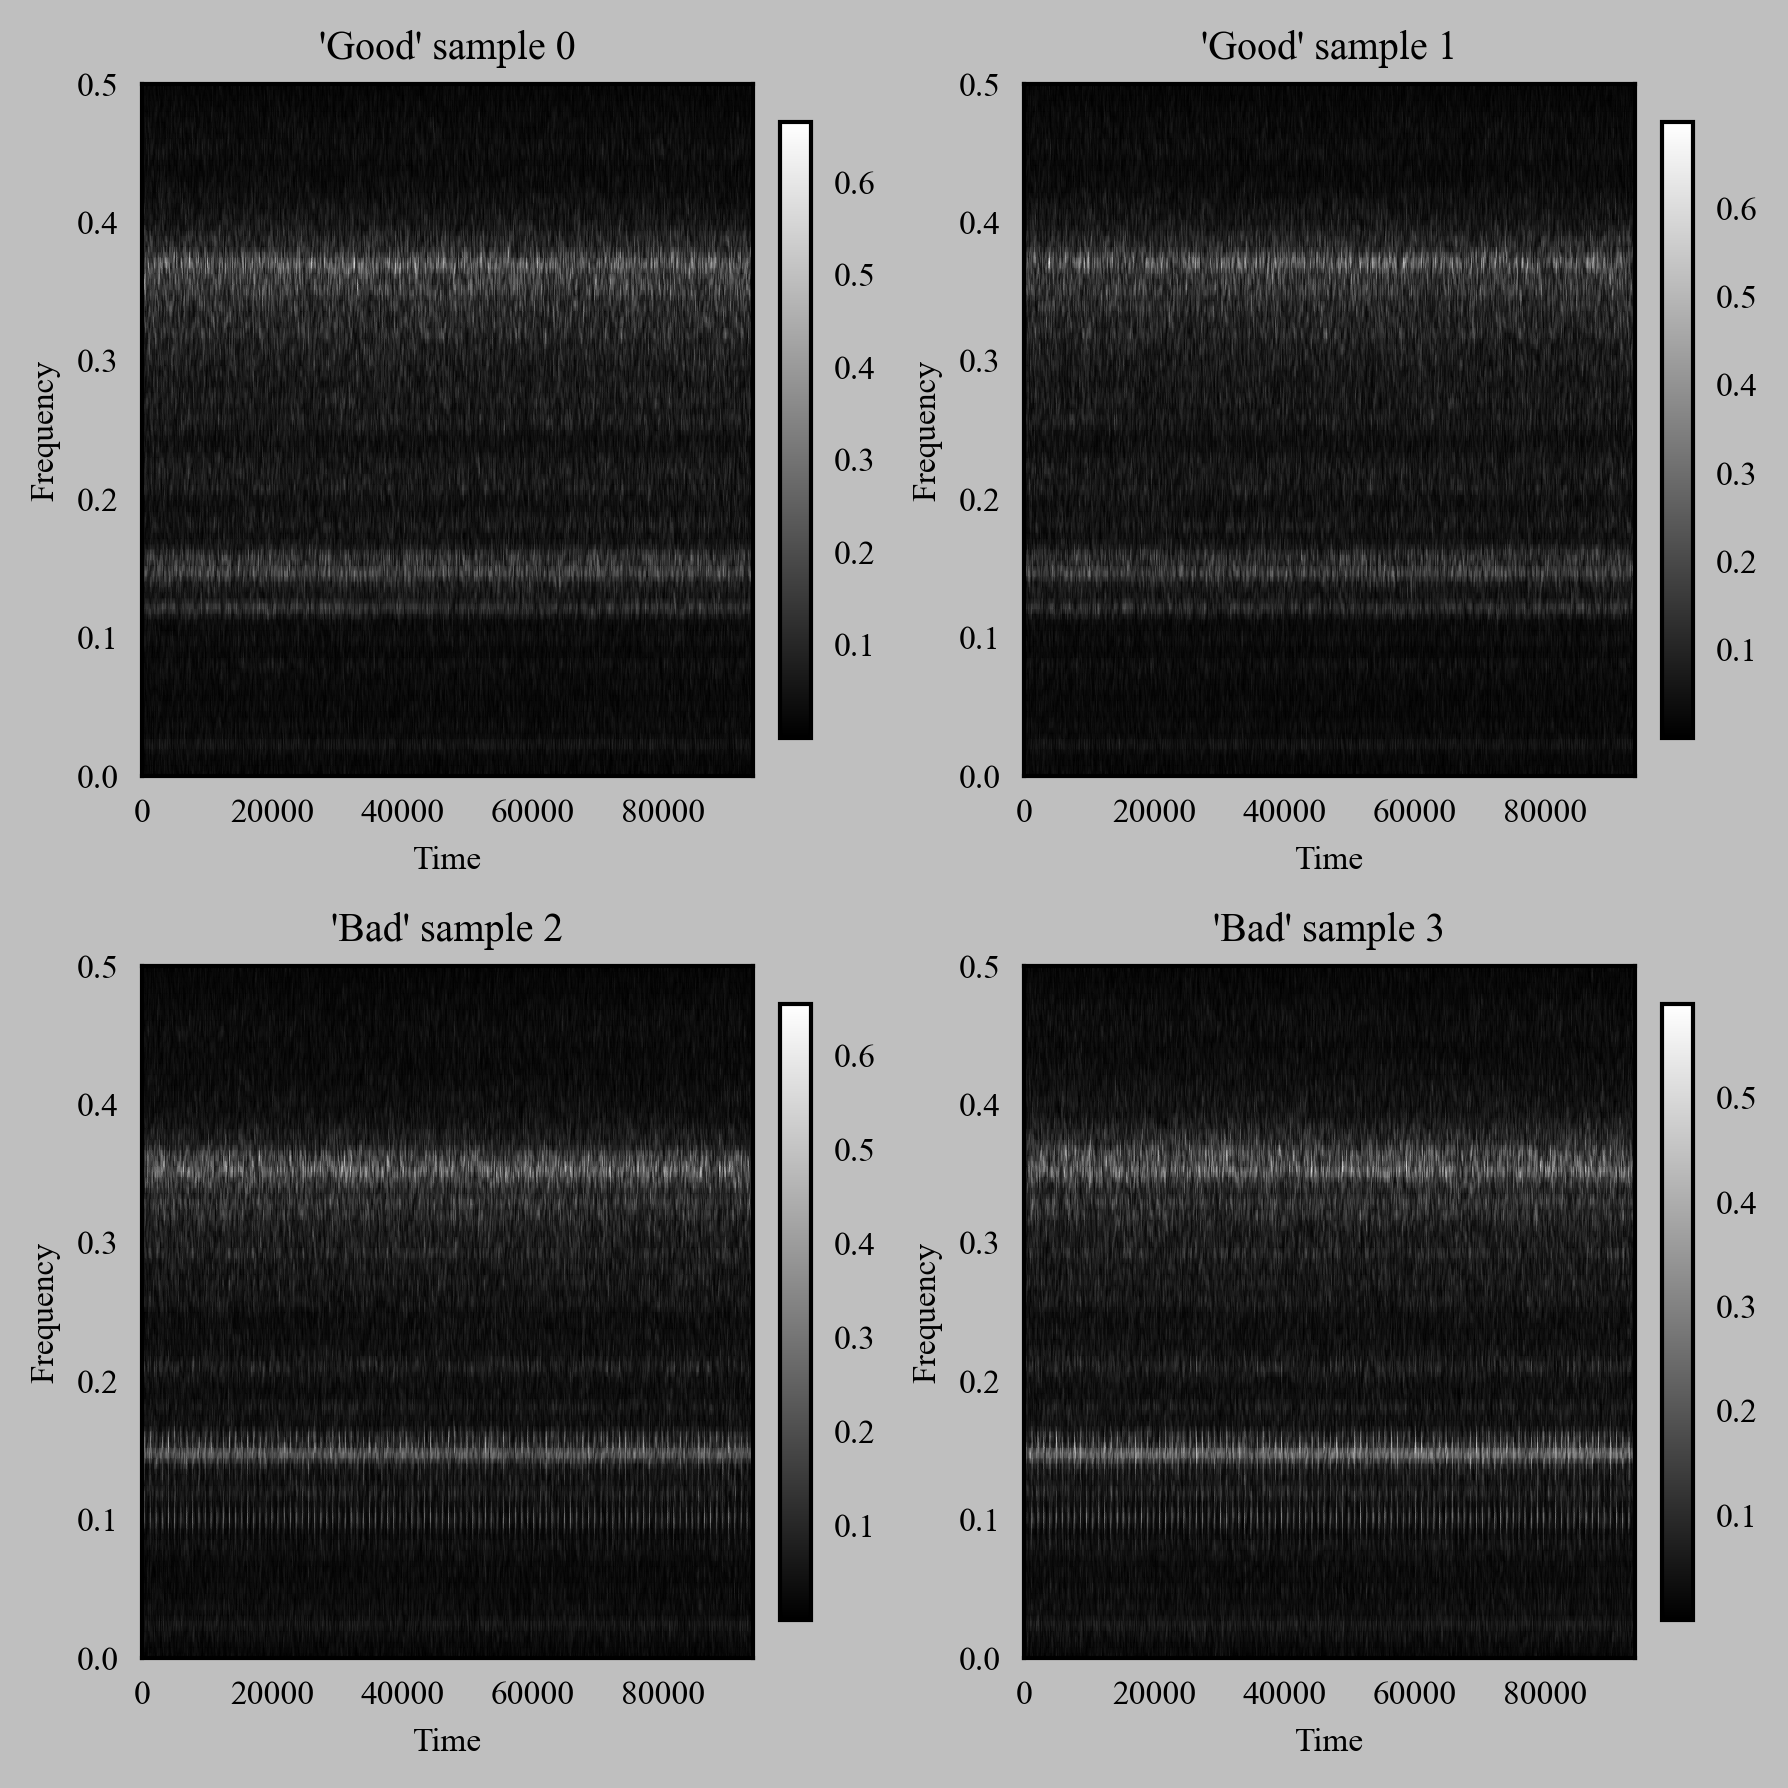

In [44]:
from scipy import signal


# Compute the Short-Time Fourier Transform for good and bad samples
def perform_stft(x, nperseg=256, noverlap=128):
    f, t, Zxx = signal.stft(x, nperseg=nperseg, noverlap=noverlap)
    return f, t, Zxx

good_stft = [perform_stft(detrend(df.iloc[i])) for i in good_samples]
bad_stft = [perform_stft(detrend(df.iloc[i])) for i in bad_samples]

fig, axes = plt.subplots(2, 2, figsize=(6, 6), dpi=300)

for i, ax in enumerate(axes.flatten()):
    if i < 2:
        f, t, Zxx = good_stft[i]
        pcm = ax.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
        ax.set_title(f"'Good' sample {i}")
        ax.set_xlabel('Time')
        ax.set_ylabel('Frequency')
        fig.colorbar(pcm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    else:
        f, t, Zxx = bad_stft[i % 2]
        pcm = ax.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
        ax.set_title(f"'Bad' sample {i}")
        ax.set_xlabel('Time')
        ax.set_ylabel('Frequency')
        fig.colorbar(pcm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()